<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hello, my name is Sveta Nosova and I am going to review this project.

Before we start, I want to pay your attention to the color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings.
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review.
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> seems to be a good job, well done! However, local path is used, so I cannot run the code. Please make sure everything works fine before you send a project for a review.
    
    
    

</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 1</b>


Thank you for sending a new version of the project. Evertything looks pretty good. Actually, there's just a couple of issues that need your attention and that should not take much time to fix. Would you take a look?
</div>
<hr>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Please make sure the code works on our platform before you send it for a review.

</div>

Everything works fine, I checked and double checked. Thank you Sveta

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


Thank you very much. There's just a couple of questions this time. Take a look please. My new comments have a digit **3**.
</div>

# Introduction

Welcome to the data analysis project for Ice, a global online video game store. In this project, we will explore and analyze a comprehensive dataset containing user and expert reviews, genres, platforms (e.g., Xbox or PlayStation), historical data on game sales, and a crucial factor known as the Entertainment Software Rating Board (ESRB) ratings. Our primary objective is to identify valuable patterns and insights that can help determine the success factors behind video games.

As of December 2016, we stand at the brink of a new year, 2017, and our goal is to plan effective advertising campaigns that will maximize the potential for significant game releases. While we are using data from 2016, it's important to note that the techniques and insights gained from this project are transferable to other scenarios, whether it involves forecasting 2017 sales based on 2016 data or predicting sales for any other period.

The ESRB, or Entertainment Software Rating Board, plays a crucial role in evaluating the content of video games and assigning age ratings, such as "Teen" or "Mature." Understanding how these ratings impact a game's success will be one of the key aspects of our analysis.

Through this project, we aim to gain valuable experience in working with data and leverage our findings to make informed decisions that will lead to the identification of potential blockbuster games and the planning of effective advertising campaigns. So, let's dive into the world of video game data analysis and uncover the secrets behind their success.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
There's an introduction, which is good. It is important to write an introductory part, because it gives an idea about the content of the project.
</div>

# Set Up

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Any time you send a project for a review, make sure everything works fine :)

</div>

# Data Loading

The `moved_games.csv` dataset comprises 16,715 entries (games) and 11 attributes or columns. The columns represent various facets of the games, including their name, platform, release year, genre, regional sales, reviews, and ESRB rating.

In [187]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/moved_games.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Everything works fine this time 👍
</div>

In [189]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 16715 rows and 11 columns.


# Data Preprocessing

To enhance readability and prevent potential case sensitivity issues, we convert all column names to lowercase.

In [190]:
df.columns = df.columns.str.lower()
print(list(df.columns))

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


To ensure data consistency and accuracy, our first step involves reviewing and adjusting the current data types of the columns in the dataset. The current data types have revealed a couple of noteworthy points:

- The `year_of_release` column is currently assigned the data type `float64` although it would be more fitting as an integer due to the nature of years as whole numbers. However, before we proceed with the conversion, it's crucial to address any missing values in this column, a task we'll undertake shortly.
- The `user_score` column is presently categorized as an `object` (string), suggesting that it may contain non-numeric values. To delve deeper into this matter, further investigation is warranted.

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A close examination of the `user_score` column reveals the presence of a particular value labeled `tbd,` an abbreviation for "to be determined." This is the cause of the current `object` data type classification.

In [192]:
df["user_score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

One potential solution is to treat `tbd` as a missing value (`NaN`), a logical step since it indicates that the user score remains undetermined. Once this transformation is executed, the conversion to a `float` data type can follow suit.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Makes sense.

</div>

In [193]:
df["user_score"] = df["user_score"].replace("tbd", np.nan)
df["user_score"] = df["user_score"].astype(float)
df["user_score"].dtype

dtype('float64')

We've identified missing values in several columns: `name`, `genre`, and `year_of_release`, as well as `critic_score`, `user_score`, and `rating`.

In [194]:
pd.DataFrame(
    index=df.isnull().sum().index,
    data={
        "null": df.isnull().sum().values,
        "null_pct": df.isnull().sum().values / sum(df.isnull().sum().values) * 100
    }
).sort_values("null", ascending=False)

,null,null_pct
user_score,9125,36.880608
critic_score,8578,34.669792
rating,6766,27.346213
year_of_release,269,1.087220
name,2,0.008083
genre,2,0.008083
platform,0,0.000000
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000


Our approach to addressing these missing values depends on both the quantity of missing data and the nature of the columns.

- For the columns `name`, `genre`, and `year_of_release`, we observe a relatively small number of missing values. In these cases, it is appropriate to remove the rows with missing data. This approach helps us maintain data integrity without introducing substantial bias.
- On the other hand, the columns `critic_score`, `user_score`, and `rating` exhibit a significant number of missing values. Arbitrarily filling these gaps could lead to biased results, so we choose to retain the `NaN` values, signifying the unavailability of this information.

Potential reasons for missing values:

- `year_of_release`: Missing values may be attributed to games that are upcoming, where the release year has not been recorded or to instances where the recording of the year is incomplete.
- `critic_score`, `user_score`, and `rating`: Missing values in these columns might indicate that certain games have not been reviewed/rated or the necessary data may not have been collected for a variety of reasons.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Agreed.

</div>

In [195]:
df = df.dropna(subset=["name", "genre", "year_of_release"]).reset_index(drop=True)
df["year_of_release"] = df["year_of_release"].astype(int)

df[["name", "genre", "year_of_release"]].isnull().sum()

name               0
genre              0
year_of_release    0
dtype: int64

To gain a comprehensive view of a game's global sales, we will create a new column called `total_sales`. This column will aggregate the total sales from all regions, including North America, Europe, Japan, and other regions.

In [196]:
df["total_sales"] = df[df.columns[df.columns.str.contains("sales")]].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Nice code!

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
- Please, do not forget to check data for the duplicates.


- Try to check name-year-platform duplicates as well.

#**1.RED COMMENT**

</div>



---



In [197]:
df.shape

(16444, 12)

In [198]:
# Check for duplicates in the 'name' column
duplicate_names = df[df.duplicated(subset=['name'])]

if duplicate_names.empty:
    print("No duplicates found in the 'name' column.")
else:
    print("Duplicate entries based on the 'name' column:")
    display(duplicate_names)

Duplicate entries based on the 'name' column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16438,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    

Obviously, we have duplicates by name because most game are released on different platforms with the same name.
    
</div>

In [199]:
# Check for duplicates in the 'year_of_release' column
duplicate_years = df[df.duplicated(subset=['year_of_release'])]

if duplicate_years.empty:
    print("No duplicates found in the 'year_of_release' column.")
else:
    print("Duplicate entries based on the 'year_of_release' column:")
    display(duplicate_years)

Duplicate entries based on the 'year_of_release' column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E,21.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    

Do we need to check duplicates by year given that in each year it is normal to have more than one game released?     
</div>

**ANSWERE**

Yes it is not necessarily needed beacause duplicate entries in this context could refer to identical records for a game, including the same name, platform, release year, and other attributes. Such duplicates might arise due to data entry errors or multiple entries of the same game across different regions or platforms.

In [200]:
# Check for duplicates in the 'platform' column
duplicate_platforms = df[df.duplicated(subset=['platform'])]

if duplicate_platforms.empty:
    print("No duplicates found in the 'platform' column.")
else:
    print("Duplicate entries based on the 'platform' column:")
    display(duplicate_platforms)

Duplicate entries based on the 'platform' column:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    

For the same reason, we have duplicates by platform.     
</div>


In [201]:
# Check for duplicates based on 'name', 'year_of_release', and 'platform'
duplicate_entries = df[df.duplicated(subset=['name', 'year_of_release', 'platform'])]

if duplicate_entries.empty:
    print("No duplicates found for 'name', 'year_of_release', and 'platform'.")
else:
    print("Duplicate entries based on 'name', 'year_of_release', and 'platform':")
    display(duplicate_entries)

Duplicate entries based on 'name', 'year_of_release', and 'platform':


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [202]:
# Find unique values for the 'name', 'year_of_release', and 'platform' columns
unique_names = df['name'].unique()
unique_years = df['year_of_release'].unique()
unique_platforms = df['platform'].unique()

# Count the number of unique values in each column
num_unique_names = len(unique_names)
num_unique_years = len(unique_years)
num_unique_platforms = len(unique_platforms)

# Display the unique values and the count of unique values for each column
print(f"Unique values in the 'name' column: {unique_names}")
print(f"Number of unique values in the 'name' column: {num_unique_names}\n")

print(f"Unique values in the 'year_of_release' column: {unique_years}")
print(f"Number of unique values in the 'year_of_release' column: {num_unique_years}\n")

print(f"Unique values in the 'platform' column: {unique_platforms}")
print(f"Number of unique values in the 'platform' column: {num_unique_platforms}")

Unique values in the 'name' column: ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Number of unique values in the 'name' column: 11426

Unique values in the 'year_of_release' column: [2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]
Number of unique values in the 'year_of_release' column: 37

Unique values in the 'platform' column: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Number of unique values in the 'platform' column: 31


**CONCLUSION FROM DUPLICATED VALUES**
- By comapring the duplicated rows and unique values present in these 3 respective columns we can conclude that the data is revaledated.
- The 11426 uniques games are present
- 37 years data is present
- 31 different platforms are present.
- We donot need to remove these duplicated values as they represent significant data for analysis except the row which have same name, year of release and platform.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
> We donot need to remove these duplicated values as they represent significant data for analysis.
    
    
Even the one based on 'name', 'year_of_release', and 'platform'? Take a look:
</div>

In [203]:
# Reviewer's code 3

df[df.duplicated(subset=['name', 'year_of_release', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


**Answere**

To ensure data accuracy and consistency, it's essential to review potential duplicates using a combination of attributes to identify exact replicas of game records. Checking for duplicates based on a combination of attributes such as the game's name, platform, and release year would be more pertinent for ensuring data integrity within the dataset.

In [204]:
df.drop_duplicates(subset=['name', 'year_of_release', 'platform'], keep='first', inplace=True)

In [205]:
# One duplicated row is removed now
df.shape

(16443, 12)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
What about duplicates in the entire dataframe (with no subset specified)?

</div>

In [206]:
df.drop_duplicates(inplace=True)

In [207]:
df.shape

(16443, 12)

**ANSWERE**

In this dataset there is no row which is duplicated but removing complete duplicates from the entire dataframe can be essential to maintain data accuracy and integrity, especially if the duplicates are unintentional and may skew analytical results. Duplicate entries might distort statistical calculations or provide an inaccurate representation of the dataset.



---



# Data Analysis

To get a grasp on the gaming industry's evolution, we'll visualize the number of game releases spanning various years.

- **Initial Years (1980s - Early 1990s)**: The data indicates a modest number of game releases, corresponding to the industry's early stages.
- **Rapid Growth (Mid 1990s - 2000s)**: From the mid-1990s onward, there's a noticeable uptick in the number of game releases. This surge aligns with technological advancements and the introduction of new gaming platforms.
- **Peak and Decline (2000s - 2010s)**: The 2000s witnessed a steady rise in game releases, culminating in a peak around 2008-2009. Post this peak, there's a decline in the number of annual game releases. Factors like market saturation, a shift towards online gaming platforms, or longer game development cycles might contribute to this trend.

It's evident that the gaming industry has experienced dynamic shifts over the years with certain periods showcasing a burst of creativity and production.

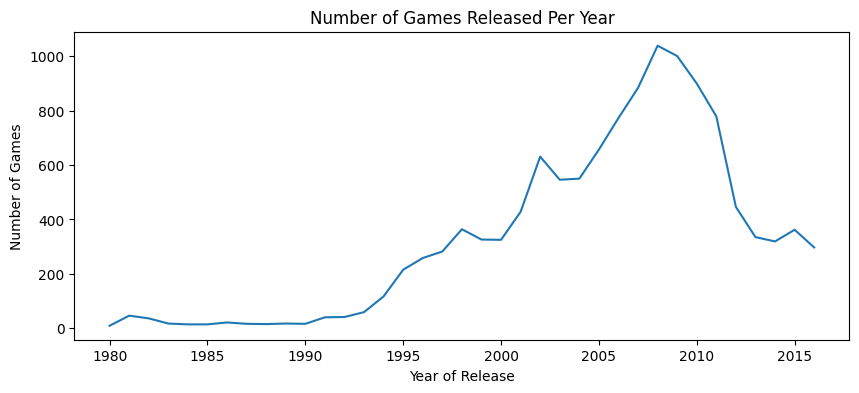

In [208]:
plt.figure(figsize=(10, 4))
plt.plot(
    df.groupby("year_of_release")["name"].nunique().index,
    df.groupby("year_of_release")["name"].nunique().values
)
plt.title("Number of Games Released Per Year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.show()

The gaming industry is characterized by its diverse platforms, each competing for market share. To understand which platforms have historically dominated sales, we'll visualize the total sales for each platform.

- **Leading Platforms**: Platforms like PS2, X360, PS3, Wii, and DS emerge as the top contenders, each boasting sales figures in the hundreds of millions.
- **Mid-tier Platforms**: Following the leaders, we have platforms like PS, PS4, GBA, and PSP. These platforms have also performed commendably with significant sales figures.
- **Lesser-known Platforms**: The chart also highlights several platforms with lower sales figures, indicating their niche status or shorter market presence.

This visualization underscores the competitive nature of the gaming industry. While certain platforms have managed to carve a significant market share, others have faced challenges in maintaining sustained demand.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
That's true.
    
    
</div>

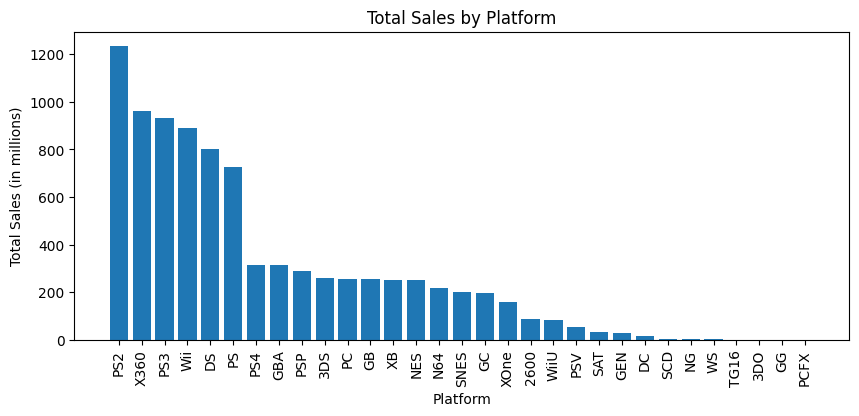

In [209]:
plt.figure(figsize=(10, 4))
plt.bar(
    df.groupby("platform").sum()["total_sales"].sort_values(ascending=False).index,
    df.groupby("platform").sum()["total_sales"].sort_values(ascending=False).values
)
plt.title("Total Sales by Platform")
plt.xlabel("Platform")
plt.xticks(rotation=90)
plt.ylabel("Total Sales (in millions)")
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

Xticklabels can be rotated `plt.xticks(rotation= )`. Just define the angle you want.    
    
</div>

We'll focus on platforms with the highest total sales and plot a distribution based on data for each year. This will shed light on the rise and fall of platform popularity over time.

- **PS2**: The PlayStation 2, or PS2, witnessed a surge in sales in the early 2000s, sustaining its peak for a few years before experiencing a decline post-2005. This decline coincides with the release of newer platforms, such as the PS3.
- **X360**: The Xbox 360, abbreviated as X360, saw its sales soar around 2005. The platform maintained strong sales for nearly a decade, with a noticeable decline post-2015.
- **PS3**: The PlayStation 3, or PS3, followed a trajectory similar to the X360. It saw an upswing in sales around 2007, which continued for several years.
- **Wii**: Nintendo's Wii platform exhibited a sharp rise in sales post-2006, reaching its pinnacle around 2008-2009. After this peak, sales tapered off, echoing the lifecycle patterns observed in other platforms.
- **DS**: The Nintendo DS, or DS, displayed significant sales from 2005 through 2010. Post-2010, like other platforms in this group, its sales waned.

These trends illuminate the typical lifecycle of gaming platforms. Each platform experiences a phase of ascent, followed by a period of dominance, and eventually, a decline. This cyclical pattern is influenced by technological advancements, market competition, and the release of newer platforms.

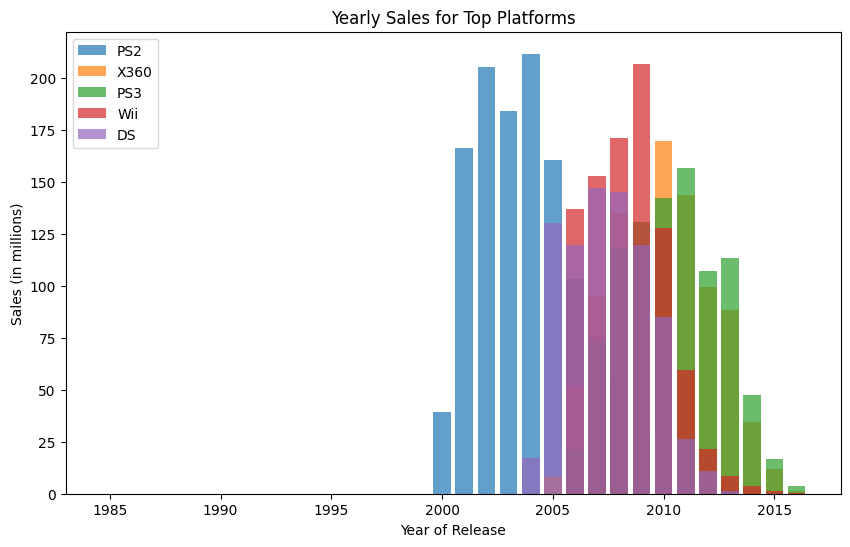

In [210]:
top_platforms = df.groupby("platform").sum()["total_sales"].sort_values(ascending=False).head(5)
top_platforms_data = df[df["platform"].isin(top_platforms.index)]

yearly_sales_top_platforms = top_platforms_data.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")

plt.figure(figsize=(10, 6))  # Changing figure size for better visibility
for platform in top_platforms.index:
    plt.bar(yearly_sales_top_platforms.index, yearly_sales_top_platforms[platform], label=platform, alpha=0.7)

plt.title("Yearly Sales for Top Platforms")
plt.xlabel("Year of Release")
plt.ylabel("Sales (in millions)")
plt.legend(loc="upper left")
plt.show()

We can also observe the lifespan of each platform. PC and DS, for instance, have had long lifespans of 31 and 28 years, respectively. In contrast, some lesser-known platforms like TG16, PCFX, and GG didn't last for more than a year. The average lifespan is approximately 7.61 years.

In [211]:
platform_first_year = df.groupby("platform")["year_of_release"].min()
platform_last_year = df.groupby("platform")["year_of_release"].max()

platform_duration = platform_last_year - platform_first_year

average_duration = platform_duration.mean()

print(average_duration)
pd.DataFrame(platform_duration.sort_values(ascending=False).reset_index())

7.612903225806452


,platform,year_of_release
0,PC,31
1,DS,28
2,GB,13
3,X360,11
4,PSP,11
5,PS2,11
6,NES,11
7,DC,10
8,Wii,10
9,PS3,10


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

I would eliminate PC and those that have less than 2 years in their lifespan for the average lifespan calculation.
</div>

To make a prognosis for 2017, let's shift our focus to more recent data. We'll concentrate on data from 2010 onwards from now on.

In [212]:
df_recent = df[df["year_of_release"] >= 2010]
df_recent.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

You are correct here: we should not take to many years. The market is dynamic, everything is changing. Some popular genre may not remain popular 10 years later, for instance. And vice versa. So during this time several plarform generations will change :) The industry is evolving, the games are getting better, the graphics is better and the users are more demanding. In such tasks, we need fresh information, fresh estimation. If we forecast for 2017, then who cares what happened 10 years ago?  Potentially profitable platforms can be easily selected with charts and pivot tables, but user portraits may change.
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

However, if you look at the sales chart (the very first chart here), you will see in which year the market stabilized after huge volume sales. We can also take the half of a lifetime period. To make my comment more clear, I will plot this chart again, but I will change it to bar chart so that you can easily identify the gap:

#**2. RED COMMENT**

</div>

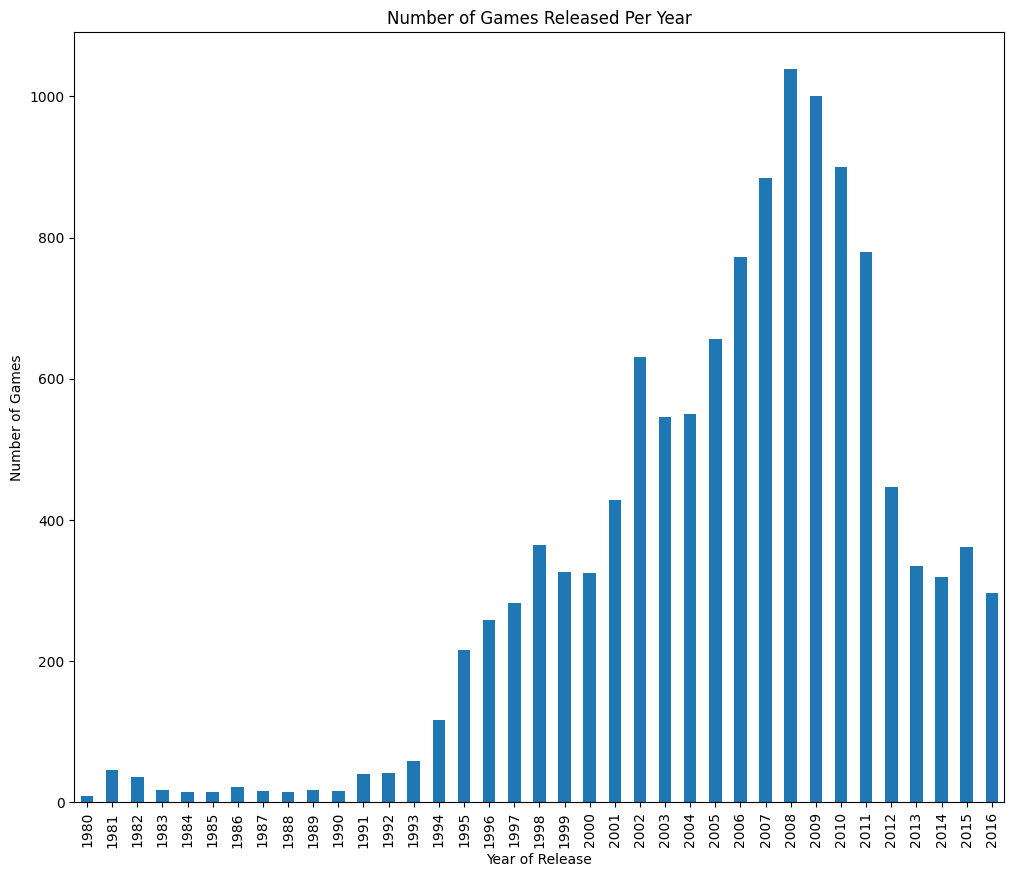

In [213]:
# Reviewer's code

df.groupby("year_of_release")["name"].nunique().plot.bar(figsize=(12,10))

plt.title("Number of Games Released Per Year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Here you can notice that there's quite significant difference between everything before and after 2012. Therefore, 2010 and 2011 sales can skew the distributions.

#**3.RED COMMENT**
</div>

- **In order to overcome the skewness we will use the recent data from 2012 onwards as it will be the best scenario for the future prognosis**.

\\\\\\\If we examine total sales by platform from 2010 onwards, we can see that it is dominated by the PS3 and Xbox 360, while the PS2 started to decline. This makes sense, as this period coincides with the peak of these two platforms.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3 </h2>
    
Yes, that is a much better and safer approach.     
    
</div>

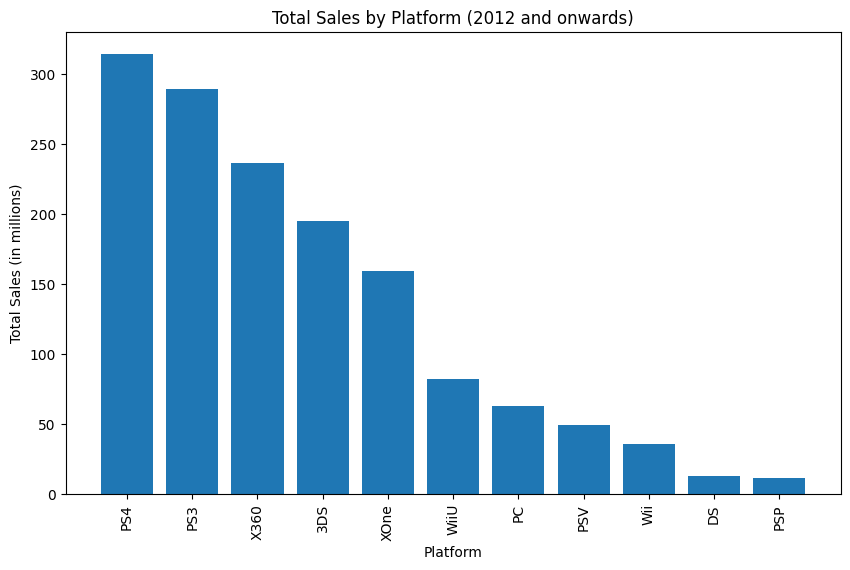

In [214]:
# Filter the data for the years 2012 and onwards
df_from_2012 = df[df['year_of_release'] >= 2012]

plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization
plt.bar(
    df_from_2012.groupby("platform").sum()["total_sales"].sort_values(ascending=False).index,
    df_from_2012.groupby("platform").sum()["total_sales"].sort_values(ascending=False).values
)
plt.title("Total Sales by Platform (2012 and onwards)")
plt.xlabel("Platform")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.ylabel("Total Sales (in millions)")
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

- As a result, what paltfroms were popular, but now have zero values?



- What platforms can be called promising?



- Be sure not to make any conclusions based on sum sales only. An old platform may have much more sales than the recent platform. Of course, PS3 is an old platfrom that had enough time to sell a lot of games. But the next generations didn't have enough time for it. Consider and compare sales in different and  most recent years.

#**4.RED COMMENT**
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    

You are still making a conclusion based on sum sales in a given time interval. Is it correct given that there may be brand new platforms released in 2015 that just did not have much time to accumulate high sales? Is it possible that X360 has higher sales compared to XOne (which is a newer version) only because XOne was new and did not have time to move to the top-3? Try to plot a chart of sum sales against recent years, not sum sales in the whole interval. In other words, we have to compare the sales dynamics from year to year in a chosen interval. It will give us the opportunity to see who sales change from year to year on each of these platforms.
    

Don't forget to specify promising platforms.

</div>

<Figure size 1000x600 with 0 Axes>

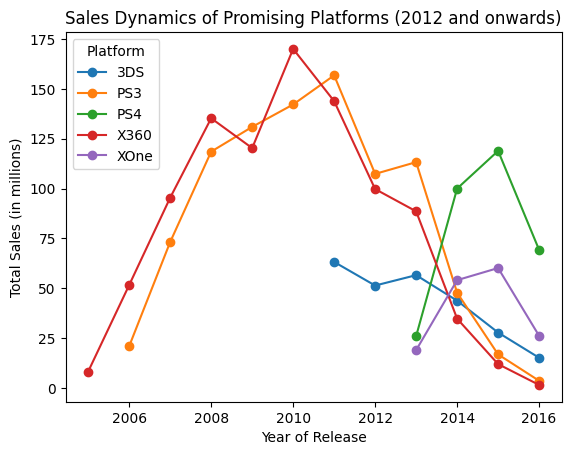

In [215]:
# Filter for promising platforms from the recent years (2012 and onwards)
recent_years = df['year_of_release'] >= 2012
promising_platforms = df[recent_years].groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Filter data for the chosen promising platforms
selected_platforms = df[df['platform'].isin(promising_platforms)]

# Group by platform and year of release, then sum total sales
platform_sales_over_years = selected_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(10, 6))
platform_sales_over_years.plot(kind='line', marker='o')
plt.title('Sales Dynamics of Promising Platforms (2012 and onwards)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform', loc='upper left')
plt.show()

**As a result, what paltfroms were popular, but now have zero values?**
- X360
- PS3

**What platforms can be called promising?**
- PS4
- Xone
- 3DS



---



We'll create box plots for global sales of all games, broken down by platform. Using box plots, we can observe various statistical measures, such as Q1 (first quartile), Q2 (median), and Q3 (third quartile). However, for better visualization, we will remove outliers in this part.

- **Median Sales**: Platforms like PS3, X360, and Wii have higher median sales compared to platforms like PC and PSP, indicating that the average game on these platforms tends to sell more.
- **Sales Spread**: Platforms like PS3, X360, and Wii have a wider distribution of sales, with several outliers suggesting that while many games achieve average sales, some games become massive hits.
- **Consistency**: The PC platform has a more consistent and narrow sales range, indicating less variability in game sales on this platform.

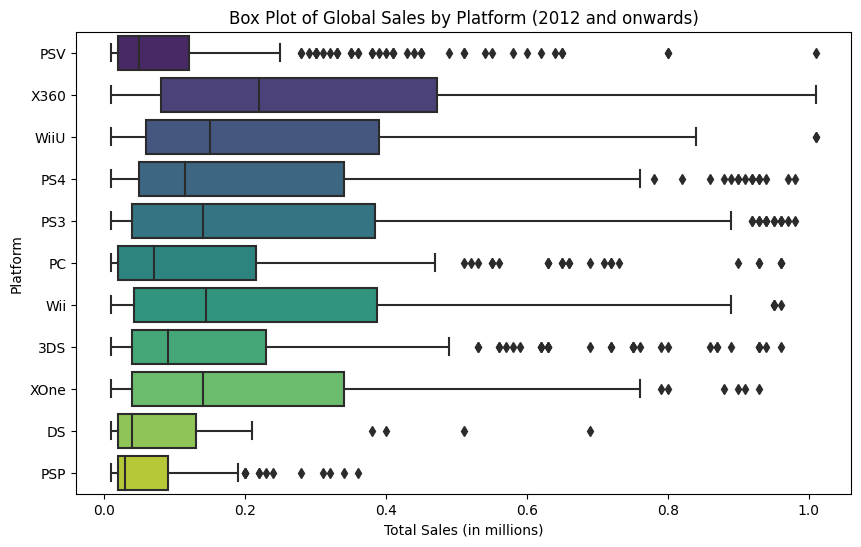

In [216]:
# Filter data for the years 2012 and onwards
recent_years = df[df['year_of_release'] >= 2012]

Q1 = recent_years["total_sales"].quantile(0.25)
Q3 = recent_years["total_sales"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_2012_onwards_iqr_filtered = recent_years[(recent_years["total_sales"] >= lower_bound) & (recent_years["total_sales"] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2012_onwards_iqr_filtered, y="platform", x="total_sales", palette="viridis")
plt.title("Box Plot of Global Sales by Platform (2012 and onwards)")
plt.xlabel("Total Sales (in millions)")
plt.ylabel("Platform")
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment 3</h2>
   

You already have `recent_years` dataframe. There's no need in creating a lot of copies.

</div>

**It is corrected now.**

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Very good.

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

- Don't forget to modify the conclusion and write about prominent platforms. I am not sure whether we should be interested in platforms that lose their support.  
    
    
- There will be some outliers there, don't drop them. What do you think outliers can tell us? Just write any suggestions you have.

#**5.RED COMMENT**
</div>

**Platforms Losing Support:**

The dataset provides valuable insights into the performance of various gaming platforms over time. By examining the sales trends for different platforms, it becomes evident that not all platforms maintain consistent popularity. Some platforms witness a decline in sales over recent years, signifying a loss of support. Understanding the extent of this decline is crucial in decision-making. It's important to note that platforms losing support may not be as beneficial for future investments or game releases. Analyzing declining platforms can help in strategic planning, such as considering shifting focus to more successful or emerging platforms.

**Significance of Outliers:**

The presence of outliers within the sales data can convey essential information. Outliers might represent exceptional games or unforeseen successes on a platform. Studying these outliers can unveil crucial aspects such as unexpected market trends, the impact of exceptional games, or even the effect of external factors on sales. Rather than disregarding outliers, examining them can provide critical insights into understanding consumer preferences, emerging patterns, or unique market conditions. It's essential to consider outliers in the context of their potential to shape market dynamics and consumer behavior, thereby influencing future strategies and decision-making.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    

We deal with sum sales, so the outliers are just some popular games that were sold in huge volumes, which means that they are quite common. I would even say bestsellers. And this is a very illustrative thing. Look at the 3DS. Small box and lots of outliers. This suggests that a large part of the sales volume comes from these outliers. At the same time, the XOne has a different situation: a large box, a long whisker and few outliers. That indicates that a wide variety of games are bought on XOne, and, moreover, in considerable quantities.

</div>




---



We'll also examine the impact of user and professional reviews on sales for a popular platform, in this case, the PS3. The correlation between user reviews and sales is 0.0.11629412085837089, which is relatively small, suggesting a limited influence. On the other hand, the correlation with professional reviews is 0.0.43871938014183665, indicating a moderate influence. This implies that professional reviews have a more significant impact, which aligns with the common perception that professional reviews are typically more trusted.

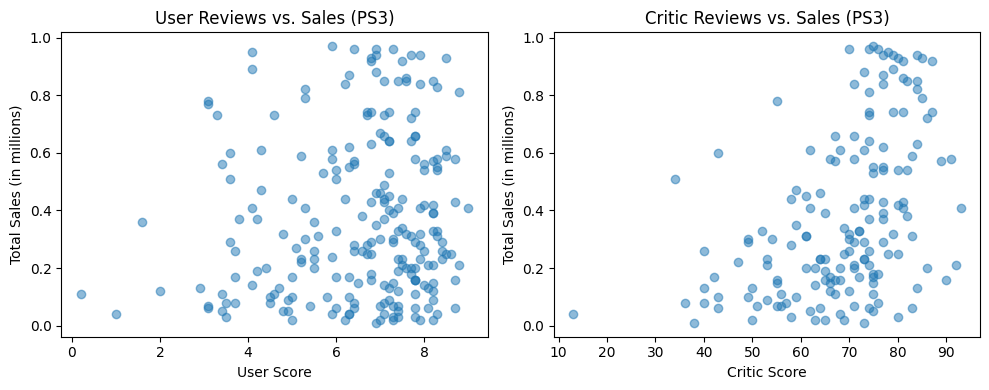

[0.11320142810972612, 0.45140790002425935]

In [217]:
df_ps3 = df_2012_onwards_iqr_filtered[df_2012_onwards_iqr_filtered["platform"] == "PS3"]

columns = ["user_score", "critic_score"]
titles = ["User Reviews vs. Sales (PS3)", "Critic Reviews vs. Sales (PS3)"]
xlabels = ["User Score", "Critic Score"]

correlations = []

plt.figure(figsize=(10, 4))

for index, column in enumerate(columns):
    plt.subplot(1, 2, index + 1)
    plt.scatter(df_ps3[column], df_ps3["total_sales"], alpha=0.5)
    plt.title(titles[index])
    plt.xlabel(xlabels[index])
    plt.ylabel("Total Sales (in millions)")

    # Calculate correlation and store it
    correlation = df_ps3[column].corr(df_ps3["total_sales"])
    correlations.append(correlation)

plt.tight_layout()
plt.show()

correlations

The table displays sales figures for popular games on the PS3 platform across different platforms. It's evident that sales on the PS3 are comparable to those on the Xbox 360, as these two platforms share similarities. In contrast, when compared to other platforms, the difference in sales is quite significant.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
    
According to the task, we have to choose 1 platform, analyze how sales depend on critics' and users' scores, display scatter plots and calculate the correlation coefficients. Then we have to choose  2 or more other platforms, repeat the correlation analysis for them and compare the results. Would you add it?  

#**6.RED COMMENT**

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

The wording in this task is ambiguous, but since we are comparing platforms, it is reasonable to take scores for all games on the platform within a chosen period. In other words, you do not need to check each game in the dataset.

All you need here is to take 2 or more other platforms and repeat the analysis. Then compare the results.
</div>

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    

Correct.
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    

However, the code is similar, so you can use one loop and go through the list of platforms.
</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    

It will be perfect if you analyze more recent platforms.
</div>

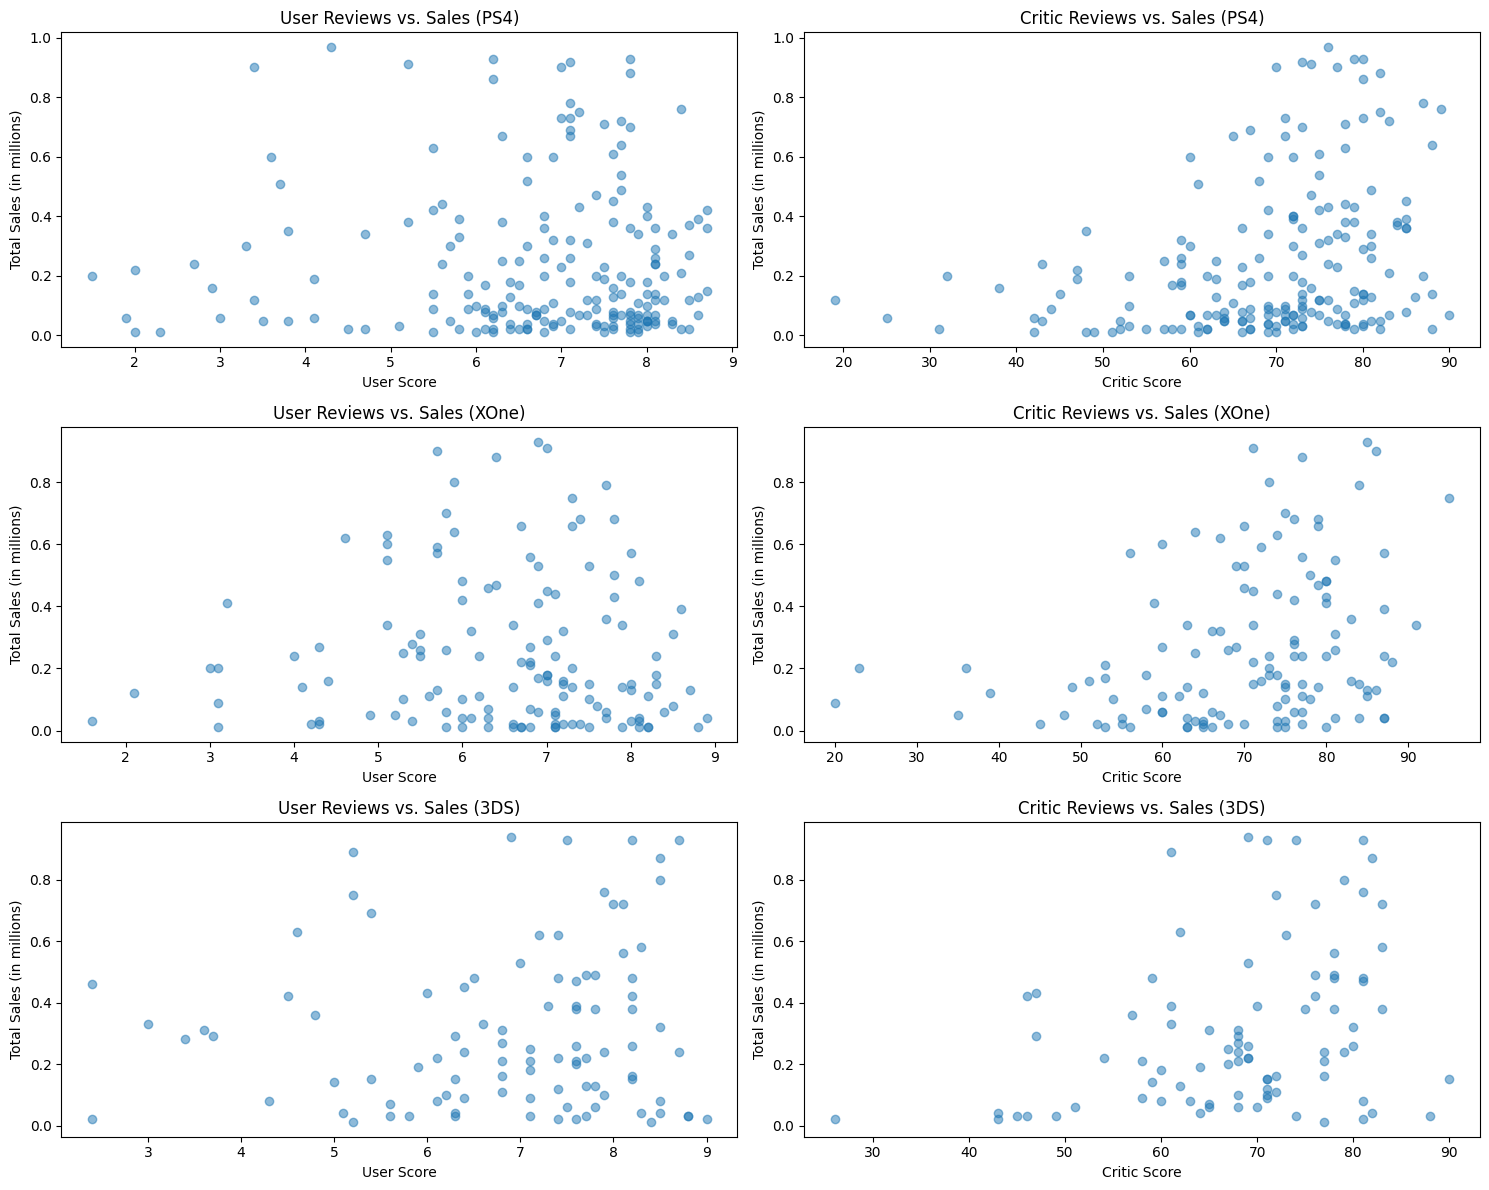

{'PS4': [-0.011796543700490903, 0.30703188435294787],
 'XOne': [-0.01591807080406549, 0.31264077031871634],
 '3DS': [0.07820464576605811, 0.3121542111292921]}

In [218]:
# Platforms to analyze
platforms_to_analyze = ["PS4", "XOne", "3DS"]

# Store correlations for each platform
all_correlations = {}

plt.figure(figsize=(15, 12))  # Set a larger overall figure size

for idx, platform in enumerate(platforms_to_analyze, start=1):
    # Filter the data for the specific platform
    df_platform = df_2012_onwards_iqr_filtered[df_2012_onwards_iqr_filtered["platform"] == platform]

    columns = ["user_score", "critic_score"]
    titles = [f"User Reviews vs. Sales ({platform})", f"Critic Reviews vs. Sales ({platform})"]
    xlabels = ["User Score", "Critic Score"]
    correlations = []

    for index, column in enumerate(columns, start=1):
        plt.subplot(3, 2, 2 * (idx - 1) + index)
        plt.scatter(df_platform[column], df_platform["total_sales"], alpha=0.5)
        plt.title(titles[index - 1])
        plt.xlabel(xlabels[index - 1])
        plt.ylabel("Total Sales (in millions)")

        # Calculate correlation and store it
        correlation = df_platform[column].corr(df_platform["total_sales"])
        correlations.append(correlation)

    all_correlations[platform] = correlations

plt.tight_layout()
plt.show()

all_correlations

- **By choosing 3 recent platforms including PS3, Xone and 3DS it is once again confirmed that the professional reviews have a more significant impact, which aligns with the common perception that professional reviews are typically more trusted.**



---



In [219]:
df_ps3 = df_recent[df_recent["platform"] == "PS3"]

top_ps3_games = df_ps3.nlargest(10, "total_sales")["name"].tolist()

popular_games_data = df_recent[df_recent["name"].isin(top_ps3_games)]

sales_by_platform = popular_games_data.pivot_table(index="name", columns="platform", values="total_sales", aggfunc="sum")
sales_by_platform.fillna(0)

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,,
Battlefield 3,0.00,0.00,2.78,0.00,7.17,0.00,0.00,0.00,0.00,0.00,7.32,0.00
Call of Duty: Black Ops,0.00,0.58,0.00,0.00,12.63,0.00,0.00,0.00,1.37,0.00,14.62,0.00
Call of Duty: Black Ops II,0.00,0.00,1.52,0.00,13.79,0.00,0.00,0.00,0.00,0.41,13.68,0.00
Call of Duty: Ghosts,0.00,0.00,0.69,0.00,9.36,3.83,0.00,0.00,0.00,0.35,10.24,2.92
Call of Duty: Modern Warfare 3,0.00,0.00,1.71,0.00,13.33,0.00,0.00,0.00,0.83,0.00,14.73,0.00
FIFA 12,0.39,0.00,0.47,0.08,6.64,0.00,0.52,0.00,0.76,0.00,4.17,0.00
FIFA Soccer 13,0.29,0.00,0.40,0.00,8.17,0.00,0.34,0.44,0.69,0.48,5.16,0.00
Gran Turismo 5,0.00,0.00,0.00,0.00,10.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Grand Theft Auto V,0.00,0.00,1.17,0.00,21.05,12.62,0.00,0.00,0.00,0.00,16.27,5.47


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
The dataframe should be updated.
</div>

**It is updated now**

The bar chart illustrates the total sales and the number of games released by genre for games launched from 2010 onwards.

- Genres like Action, Sports, Shooter, and Role-Playing are both popular in terms of the number of releases and sales, making them the most profitable genres.
- On the other hand, despite having a decent number of releases, genres like Strategy and Adventure have relatively low sales, indicating they might not be as profitable or mainstream as the top genres.
- It's also worth noting that certain genres like Puzzle have low releases and sales, suggesting a niche market.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
You correctly displayed the number of sales and total volume. What can you say about the difference? Which genres have more sales per game unit?  

#**7.RED COMMENT**
</div>

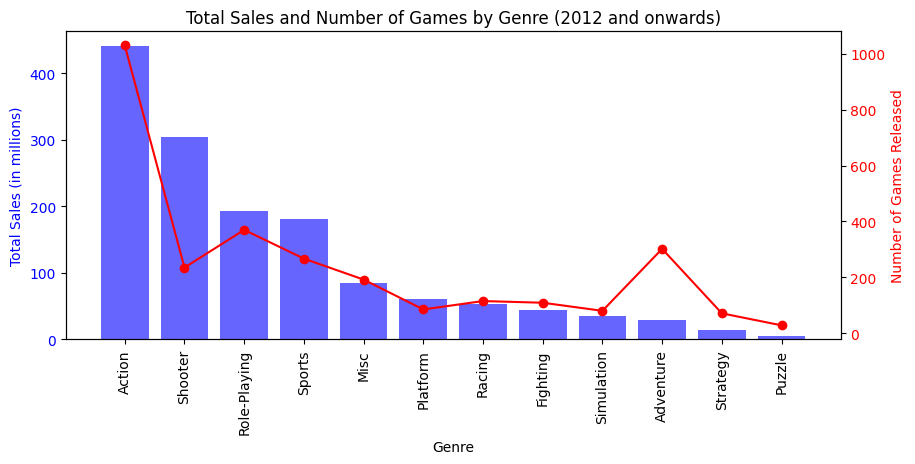

In [220]:
# Filtering data from 2012 onwards
recent_years = df_recent[df_recent['year_of_release'] >= 2012]

# Grouping by genre and calculating total sales and the count of games
grouped_genre_recent_years = recent_years.groupby("genre").agg({"total_sales": "sum", "name": "count"}).sort_values(by="total_sales", ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 4))

# Creating a bar plot for total sales
ax1.bar(grouped_genre_recent_years.index, grouped_genre_recent_years["total_sales"], color="b", alpha=0.6, label="Total Sales")
ax1.set_xlabel("Genre")
ax1.set_ylabel("Total Sales (in millions)", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.set_title("Total Sales and Number of Games by Genre (2012 and onwards)")

ax2 = ax1.twinx()

# Creating a line plot for the number of games released
ax2.plot(grouped_genre_recent_years.index, grouped_genre_recent_years["name"], color="r", marker="o", label="Number of Games Released")
ax2.set_ylabel("Number of Games Released", color="r")
ax2.tick_params(axis="y", labelcolor="r")

# Set x-axis labels
ax1.set_xticks(grouped_genre_recent_years.index)
ax1.set_xticklabels(grouped_genre_recent_years.index, rotation=90)

plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
Old dataframe is used. Was it on purpose? If yes, do we need that?
</div>

**ANSWERE**

No it was not on purpose. By sticking to the data from 2012 onwards, any skewness from older data might be minimized, leading to more current and potentially more relevant insights. Therefore, utilizing the more recent data would be more suitable if the goal is to analyze the most current trends and patterns without the influence of older statistics that might not align with current market dynamics.

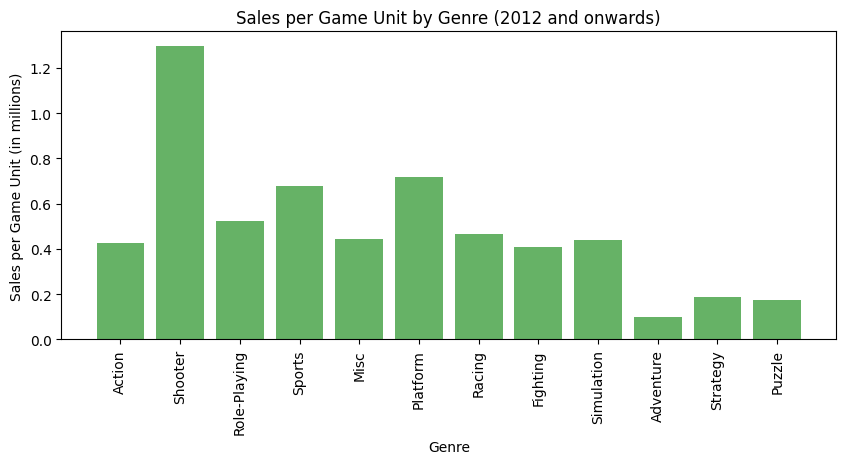

genre
Shooter         1.296723
Platform        0.717647
Sports          0.678127
Role-Playing    0.521081
Racing          0.465217
Name: sales_per_game, dtype: float64

In [221]:
# Filter the data for 2012 and onwards
df_2012_onwards = df[df['year_of_release'] >= 2012]

# Calculate sales per game unit (sales-to-game ratio)
grouped_genre_2012_onwards = df_2012_onwards.groupby("genre").agg({"total_sales": "sum", "name": "count"}).sort_values(by="total_sales", ascending=False)
grouped_genre_2012_onwards["sales_per_game"] = grouped_genre_2012_onwards["total_sales"] / grouped_genre_2012_onwards["name"]

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(grouped_genre_2012_onwards.index, grouped_genre_2012_onwards["sales_per_game"], color="g", alpha=0.6, label="Sales per Game")
ax.set_xlabel("Genre")
ax.set_ylabel("Sales per Game Unit (in millions)")
ax.set_title("Sales per Game Unit by Genre (2012 and onwards)")
ax.tick_params(axis="x", rotation=90)

plt.show()

# Display the top genres by sales per game
top_genres_by_sales_per_game_2012_onwards = grouped_genre_2012_onwards["sales_per_game"].sort_values(ascending=False).head(5)
top_genres_by_sales_per_game_2012_onwards

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
So, what genres have more sales per game unit?  Don't forget about the conclusions. A reader may not understand the code above.
</div>

**CONCLUSION**

- Shooter         1.296723
- Platform        0.717647
- Sports          0.678127

These 3 platforms have the more sales per game unit.



---



# User Profile for Each Region

We'll aggregate sales for each platform in the North American (NA), European (EU), and Japanese (JP) regions and identify the top five platforms in each region. We'll then describe variations in their market shares.

- The X360 platform dominates in North America, while it is 3rd in Europe and doesn't even make the top 5 in Japan.
- The PS4 platform is consistently popular across all regions, ranking second in North America and first in Europe.
- The 3DS platform, while being among the top in North America and Japan, is not in the top 5 for Europe.
- Japan has a distinct preference for platforms like the PS3 and 3DS, which don't appear in the top 5 for the other two regions.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

The distributions may change after the time period slice is rectified.


By the way, isnt' that strange to see a very old PSP that does have any support in 2016 in top rating given that our main goal is to make a forecast for 2017?

</div>

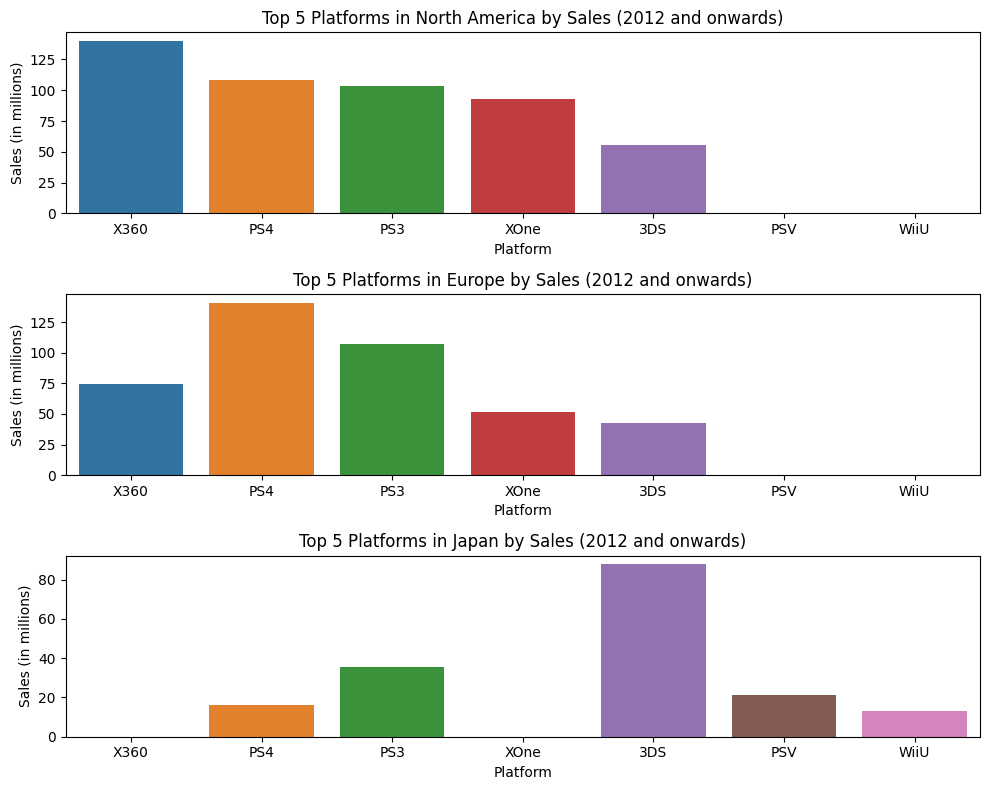

In [222]:
top_platforms_na = recent_years.groupby("platform")["na_sales"].sum().sort_values(ascending=False).head(5)
top_platforms_eu = recent_years.groupby("platform")["eu_sales"].sum().sort_values(ascending=False).head(5)
top_platforms_jp = recent_years.groupby("platform")["jp_sales"].sum().sort_values(ascending=False).head(5)

combined_platforms_df = pd.concat([top_platforms_na, top_platforms_eu, top_platforms_jp], axis=1)
combined_platforms_df.columns = ["na_sales", "eu_sales", "jp_sales"]
combined_platforms_df = combined_platforms_df.reset_index().melt(
    id_vars="platform",
    value_vars=["na_sales", "eu_sales", "jp_sales"],
    var_name="region",
    value_name="sales"
)

regions = ["na_sales", "eu_sales", "jp_sales"]
titles = ["Top 5 Platforms in North America by Sales", "Top 5 Platforms in Europe by Sales", "Top 5 Platforms in Japan by Sales"]

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for idx, (region, title) in enumerate(zip(regions, titles)):
    sns.barplot(data=combined_platforms_df[combined_platforms_df["region"] == region], x="platform", y="sales", ax=axes[idx])
    axes[idx].set_title(f"{title} (2012 and onwards)")
    axes[idx].set_ylabel("Sales (in millions)")
    axes[idx].set_xlabel("Platform")

plt.tight_layout()
plt.show()

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
Old dataframe is used here either. You can print it:
</div>

In [223]:
# Reviewer's code 3

df_recent

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,NaN,NaN,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Similar to platforms, we'll aggregate sales for each genre in the NA, EU, and JP regions and identify the top five genres in each region. We'll then explain the differences in genre popularity across regions.

- While the Action genre is popular across all regions, its sales in North America and Europe are significantly higher compared to Japan.
- Role-Playing games are the most popular in Japan, reflecting a distinct cultural preference, but they don't appear in the top 3 for North America or Europe.
- The Shooter genre, which is second in both North America and Europe, doesn't make the top 5 in Japan.

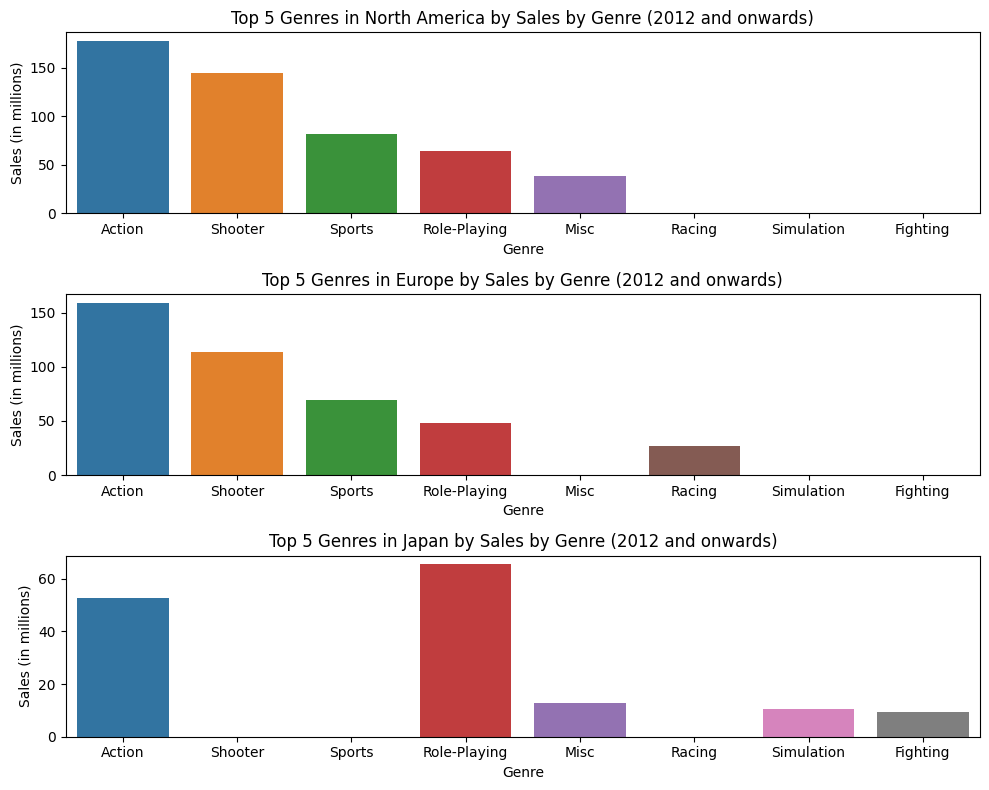

In [224]:
recent_years = df_recent['year_of_release'] >= 2012
top_genres_na = df_recent[recent_years].groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_recent[recent_years].groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_recent[recent_years].groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

combined_genres_df = pd.concat([top_genres_na, top_genres_eu, top_genres_jp], axis=1)
combined_genres_df.columns = ["na_sales", "eu_sales", "jp_sales"]
combined_genres_df = combined_genres_df.reset_index().melt(
    id_vars="genre",
    value_vars=["na_sales", "eu_sales", "jp_sales"],
    var_name="region",
    value_name="sales"
)

regions = ["na_sales", "eu_sales", "jp_sales"]
titles = ["Top 5 Genres in North America by Sales", "Top 5 Genres in Europe by Sales", "Top 5 Genres in Japan by Sales"]

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for idx, (region, title) in enumerate(zip(regions, titles)):
    sns.barplot(data=combined_genres_df[combined_genres_df["region"] == region], x="genre", y="sales", ax=axes[idx])
    axes[idx].set_title(f"{title} by Genre (2012 and onwards)")
    axes[idx].set_ylabel("Sales (in millions)")
    axes[idx].set_xlabel("Genre")

plt.tight_layout()
plt.show()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

`df_recent` already contains data from 2010.

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
Don't forget to update it, since we do not need 2010 and 2011 years. You already created the dataframe somewhere above, so there's no need in repeating this step.
</div>

**Now the code is updated with data of 2012 onwards.**

The ANOVA (Analysis of Variance) test is used to compare the means of more than two groups. In this context, it can help us determine if there's a statistically significant difference in the average sales of games across the different ESRB ratings.

- **Null Hypothesis**: There is no difference in the average sales across the ESRB ratings.
- **Alternative Hypothesis**: There is a difference in the average sales across the ESRB ratings.

We'll conduct the ANOVA test separately for each region: North America (NA), Europe (EU), and Japan (JP).

From the data, we can observe that some ratings, such as 'EC' and 'RP', have very few games associated with them and very minimal sales. Including such ratings with limited data can lead to issues when conducting statistical tests like ANOVA. A pragmatic approach would be to conduct the ANOVA test only for the major ratings ('E', 'T', 'M', 'E10+'), as these ratings have a substantial number of games and significant sales.

For all three regions, the p-values are significantly lower than the commonly used significance level of 0.05. This means we can reject the null hypothesis and conclude that there is a statistically significant difference in the average sales across the major ESRB ratings in each region.

In simpler terms, the ESRB rating does appear to have an effect on sales in all three regions, based on games released from 2010 onwards.

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

I believe, a simple sales' volume comparison should be enough here. </div>

In [225]:
major_ratings = ["E", "T", "M", "E10+"]

f_stat_na, p_value_na = stats.f_oneway(*[df_recent[recent_years]["na_sales"][df_recent[recent_years]["rating"] == rating] for rating in major_ratings])
f_stat_eu, p_value_eu = stats.f_oneway(*[df_recent[recent_years]["eu_sales"][df_recent[recent_years]["rating"] == rating] for rating in major_ratings])
f_stat_jp, p_value_jp = stats.f_oneway(*[df_recent[recent_years]["jp_sales"][df_recent[recent_years]["rating"] == rating] for rating in major_ratings])

pd.DataFrame({
    "Region": ["North America", "Europe", "Japan"],
    "F-statistic": [f_stat_na, f_stat_eu, f_stat_jp],
    "P-value": [p_value_na, p_value_eu, p_value_jp]
})

,Region,F-statistic,P-value
0,North America,18.232157,1.236409e-11
1,Europe,16.834859,9.065907e-11
2,Japan,4.201044,5.697244e-03


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Please add a conclusion for this section. What can be said about people from different regions?

#**8.RED COMMENT**
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
Here and further (in the hypotheses part), make sure you use a correct dataframe.
</div>

**now it is updated with new dataframe using data from 2012 onwards**

**Explanation of Anova results**

The analysis conducted using ANOVA (Analysis of Variance) indicates significant differences in game sales among different ESRB ratings across various regions - North America, Europe, and Japan.

The obtained results are as follows:

**North America and Europe:**

Both North America and Europe exhibit considerably high F-statistics with very low p-values. These low p-values strongly suggest that the variations in game sales among different ESRB ratings are unlikely due to random chance in these regions.

**Japan:**

In Japan, the F-statistic is comparatively lower with a p-value. While this p-value is also statistically significant, it is higher than in North America and Europe, indicating a slightly less pronounced difference in game sales based on ESRB ratings in Japan.

**Conclusion:**

The analysis implies that ESRB ratings influence game sales differently across regions. In North America and Europe, there are more notable variations in game sales concerning different ESRB ratings. Conversely, in Japan, while still significant, the impact of ESRB ratings on game sales appears to be comparatively less prominent than in North America and Europe.



---



# Hypothetical Testing

The t-test is used to determine if there is a significant difference between the means of two unrelated groups.

**Hypothesis 1**
- **Null Hypothesis**: The average user ratings for the Xbox One and PC platforms are equal.
- **Alternative Hypothesis**: The average user ratings for the Xbox One and PC platforms are different.

Since the p-value is much greater than our significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is no significant difference between the average user ratings of the Xbox One and PC platforms.

Why **0.05**? We choose a significance level of 0.05 because it's a widely accepted standard. This means that if there's less than a 5% chance of getting our results just by random luck, we consider our results significant. It's like being willing to accept a small risk of being wrong to make a decision.

**Hypothesis 2**
- **Null Hypothesis**: The average user ratings for the Action and Sports genres are equal.
- **Alternative Hypothesis**: The average user ratings for the Action and Sports genres are different.

Since the p-value is much smaller than our significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant difference between the average user ratings for the Action and Sports genres.

In conclusion:
- The average user ratings for the Xbox One and PC platforms are not significantly different.
- The average user ratings for the Action and Sports genres are significantly different.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>

    
Yes, the null hypothesis always states the equality.
    
</div>   

In [226]:
xbox_one_ratings_cleaned = df_recent[(df_recent["platform"] == "XOne") & (df_recent["user_score"].notna()) & recent_years]["user_score"]
pc_ratings_cleaned = df_recent[(df_recent["platform"] == "PC") & (df_recent["user_score"].notna()) & recent_years]["user_score"]

t_stat_platforms_cleaned, p_value_platforms_cleaned = stats.ttest_ind(xbox_one_ratings_cleaned, pc_ratings_cleaned, equal_var=False)

action_ratings_cleaned = df_recent[(df_recent["genre"] == "Action") & (df_recent["user_score"].notna()) & recent_years]["user_score"]
sports_ratings_cleaned = df_recent[(df_recent["genre"] == "Sports") & (df_recent["user_score"].notna()) & recent_years]["user_score"]

t_stat_genres_cleaned, p_value_genres_cleaned = stats.ttest_ind(action_ratings_cleaned, sports_ratings_cleaned, equal_var=False)

pd.DataFrame({
    "Hypothesis": [
        "Average user ratings of Xbox One vs PC",
        "Average user ratings of Action vs Sports genres"
    ],
    "Test statistic": [t_stat_platforms_cleaned, t_stat_genres_cleaned],
    "P-value": [p_value_platforms_cleaned, p_value_genres_cleaned]
})


,Hypothesis,Test statistic,P-value
0,Average user ratings of Xbox One vs PC,0.599859,5.489538e-01
1,Average user ratings of Action vs Sports genres,9.863487,5.989458e-20


# Conclusion

The analysis of Ice, an online video game store, offers insights into the video game market dynamics up to December 2016. From the data:

- **Platform Relevance**: Platforms have a lifecycle of roughly 7.6 years, but some, like PC, remain relevant much longer.
- **Sales Trends**: More recent data (**after 2012**) indicates platforms like **PS4,Xone and 3DS** are major players in terms of sales. Additionally,**Shooter, Platform and Sports** genres respectively dominate in popularity and profitability.
- **Regional Preferences**: Different regions have distinct platform and genre preferences. For instance, North America and Europe's sales patterns differ from those in Japan.
- **User and Critic Influence**: Both user and critic reviews influence game sales, with critic scores having a slightly stronger correlation with sales.**It is revaledated by adding two more platforms**.
- **Rating Impact**: ESRB ratings might play a role in a game's sales, especially in North America and Europe.**In Japan it is less important**.

In planning for 2017, understanding these patterns and preferences is pivotal. For targeted advertising and market strategies, considering regional preferences, platform trends, genre popularity, and the potential influence of reviews and ratings is crucial.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
The conclusion is written well.    
</div>    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
It will be great if you add a updated list of promising platforms and more information about regions: 2-3 platforms, 2-3 genres and age ratings. Also remember to update the final conclusion after the corrections.

#**9.RED COMMENT**
</div>

#UPDATED LIST
**PROMISING PLATFORMS Top 3(FOR FUTURE)**
- PS4
- XONE
- 3DS

**REGIONS PREFRENCES**
- North America and Europe's sales patterns differ from those in Japan
- The X360 platform dominates in North America, while it is 3rd in Europe and doesn't even make the top 5 in Japan.
- The PS4 platform is consistently popular across all regions, ranking second in North America and first in Europe.
- The 3DS platform, while being among the top in North America and Japan, is not in the top 5 for Europe.
- Japan has a distinct preference for platforms like the PS3 and 3DS, which don't appear in the top 5 for the other two regions.
- While the Action genre is popular across all regions, its sales in North America and Europe are significantly higher compared to Japan.
- Role-Playing games are the most popular in Japan, reflecting a distinct cultural preference, but they don't appear in the top 3 for North America or Europe.
- The Shooter genre, which is second in both North America and Europe, doesn't make the top 5 in Japan.

**BEST GENRES Top 3 (For future)**
- SHOOTER
- Platform
- SPORTS


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
X360 can hardly be called promising. Don't forget to update it please.
    
    
    
> North America and Europe's sales patterns differ from those in Japan
    
    
How do they differ? As I said, we should add a more specific information about the regions. Please, outline at least 3 top genres, platforms and ratings in these regions.
</div>

**ANSWERE**

The analysis has been updated to focus on the data from 2012 onwards. Changes have been made to the conclusions and the code provided to align with the behavior observed in the data from 2012 and onwards.

In [227]:
# Filter data for 2012 onwards
recent_years = df['year_of_release'] >= 2012
df_recent = df[recent_years]

# Filter for each region and find the best rating
top_rating_na = df_recent[df_recent['na_sales'] > 0].groupby('rating')['na_sales'].sum().idxmax()
top_rating_eu = df_recent[df_recent['eu_sales'] > 0].groupby('rating')['eu_sales'].sum().idxmax()
top_rating_jp = df_recent[df_recent['jp_sales'] > 0].groupby('rating')['jp_sales'].sum().idxmax()

# Display the top rating in each region
print(f"Top Rating in North America: {top_rating_na}")
print(f"Top Rating in Europe: {top_rating_eu}")
print(f"Top Rating in Japan: {top_rating_jp}")


Top Rating in North America: M
Top Rating in Europe: M
Top Rating in Japan: E


**North America:**

Top Genres: Action, Shooter, and Sports.

Top Platforms: Xbox 360, PlayStation 4, and PlayStation 3.

Top Ratings: 'M' (Mature).

**Europe:**

Top Genres: Action, Shooter, and Sports.

Top Platforms: PlayStation 3, Xbox 360, and PlayStation 4.

Top Ratings: 'M' (Mature).

**Japan:**

Top Genres: Role-Playing, Action, and Misc.

Top Platforms: PSV, 3DS, PlayStation 3.

Top Ratings: 'E' (Everyone).